In [45]:
#importing libraries
import re, os, tqdm, torch, torchvision
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

#set some parameters
mpl.rcParams['figure.figsize'] = [16, 9]

## Step 1: Downloading Dataset

In [10]:
train_data = torchvision.datasets.FashionMNIST(root= 'data',
                                               train= True,
                                               download= True,
                                               transform= Compose([ToTensor()]))  #totensor converts images to tensors

test_data = torchvision.datasets.FashionMNIST(root= 'data',
                                       train= False,
                                       download= True,
                                       transform= Compose([ToTensor()]))

In [3]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

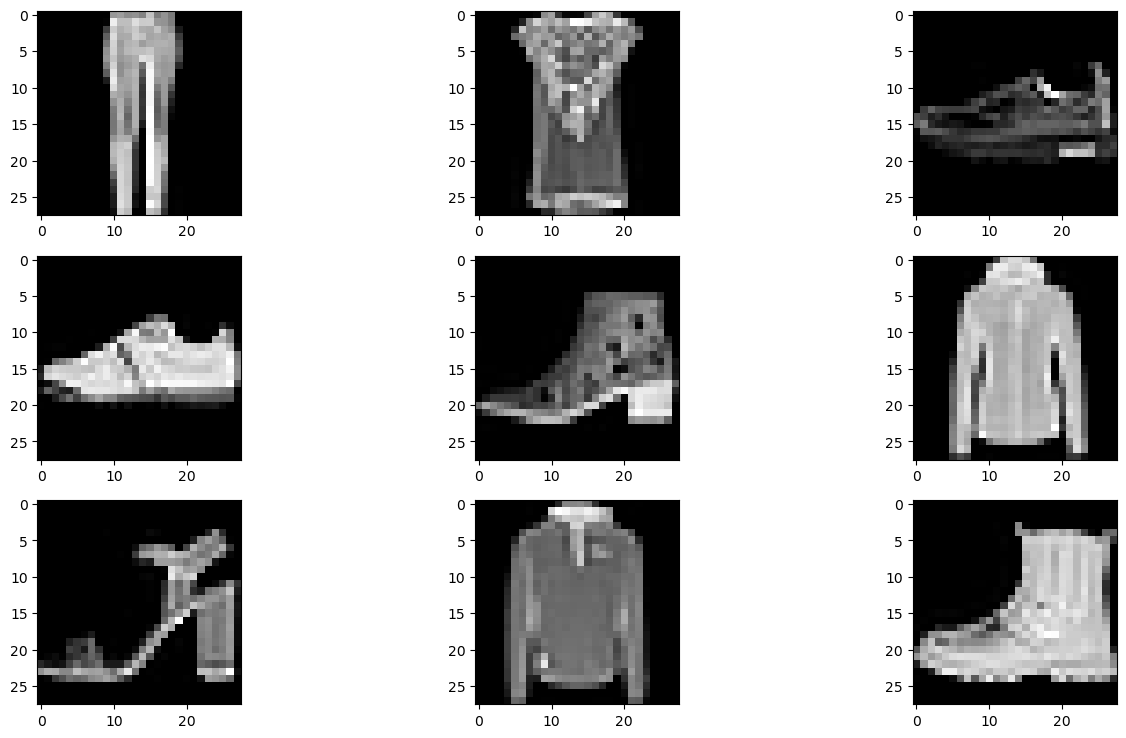

In [5]:
fig, ax = plt.subplots(nrows= 3, ncols= 3)

for row in ax:
    for col in row:
        idx= np.random.randint(0, len(train_data) - 1)
        col.imshow(train_data.data[idx], cmap= 'gray')
#         ax.title('Fashion MNIST', fontsize = 20)
plt.show()

# Step 2: Creating model

###### 3 esas activaetion function var:
1. ReLu ------- input hidden layerlarda - formula = max(0, x)
2. Sigmoid(Logistic) ---------- output layer Binary Classification
3. Softmax --------- output layer MultiClass Classification (her bir class a proba atir)

###### SGD mentiqi ile
new_w = weight - learning_rate * slope

In [31]:
# let's create a model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__() #first 3 lines are fixed
        self.flatten = nn.Flatten() #Dense or Linear layers expects 1 Dimensional array
        self.linear_relu_stack = nn.Sequential(
        nn.Linear(28 * 28, 1024), #input layer
        nn.ReLU(),        #activation func
        nn.Linear(1024, 2048), #hidden layer
        nn.ReLU(), 
        nn.Linear(2048, 10),
        nn.Softmax())
        
    def forward(self, X):
        X = self.flatten(X)
        logits = self.linear_relu_stack(X)
        return logits
    
model = NeuralNetwork()

In [12]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=2048, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2048, out_features=10, bias=True)
    (5): ReLU()
  )
)

## Step 3: Training Stage

In [32]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model.parameters(), lr = 0.01) #Stochastic Gradient Descent

train_data_loader = DataLoader(train_data, shuffle= True, batch_size= 64)
test_data_loader = DataLoader(test_data, shuffle= True, batch_size= 64)

In [33]:
for idx, batch in enumerate(train_data_loader):
    batch_images = batch[0] 
    batch_y = batch[1]
    predictions = model(batch_images)
    break

In [50]:
predictions.argmax(1)

tensor([0, 0, 0, 0, 7, 7, 0, 0, 0, 8, 0, 7, 0, 0, 0, 0, 8, 4, 7, 0, 0, 0, 4, 0,
        0, 8, 0, 0, 0, 4, 7, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
        8, 7, 0, 8, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 4])

In [38]:
batch_y

tensor([8, 6, 2, 2, 4, 4, 6, 0, 8, 9, 1, 2, 8, 9, 1, 4, 3, 5, 1, 1, 8, 9, 5, 4,
        1, 5, 3, 8, 5, 7, 6, 3, 3, 7, 7, 0, 8, 0, 0, 5, 8, 1, 0, 7, 6, 1, 9, 7,
        8, 2, 1, 8, 8, 3, 0, 4, 5, 2, 4, 0, 9, 0, 8, 5])

In [29]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [55]:
predictions[28].argmax()

tensor(0)

## Step 4: Testing Stage

## Evaliuate a model (with function)